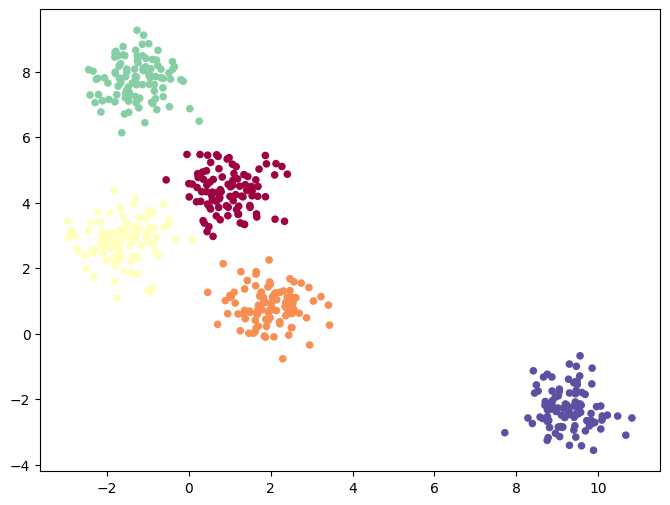

In [51]:
from sklearn.datasets import make_blobs
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])
plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20)  

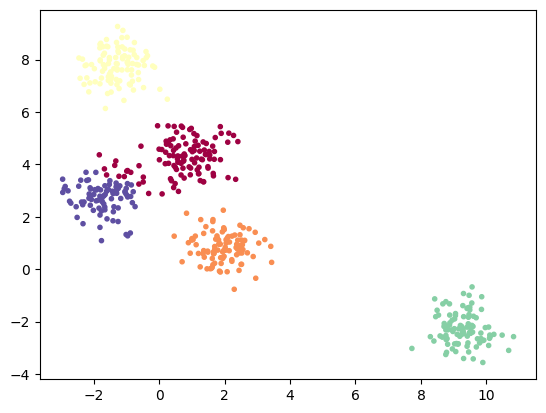

In [52]:
from sklearn.cluster import AgglomerativeClustering
clusterer = AgglomerativeClustering(linkage='complete', n_clusters=5)
clusterer.fit(X,y)
predict = clusterer.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c= colors[predict], marker= '.')


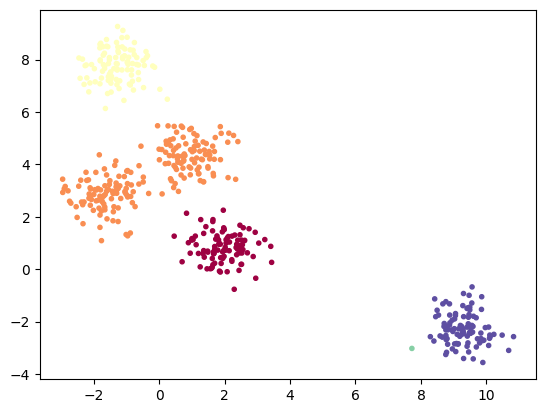

In [53]:
clusterer = AgglomerativeClustering(linkage='single', n_clusters=5)
clusterer.fit(X,y)
predict = clusterer.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c= colors[predict], marker= '.')

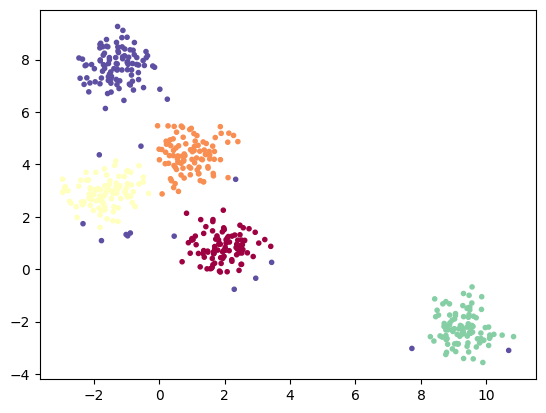

In [54]:
from sklearn.cluster import DBSCAN
clusterer = DBSCAN(eps=0.5, min_samples=5)
clusterer.fit(X,y)
predict = clusterer.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c= colors[predict], marker= '.')

<Axes: xlabel='Clusters', ylabel='WSS'>

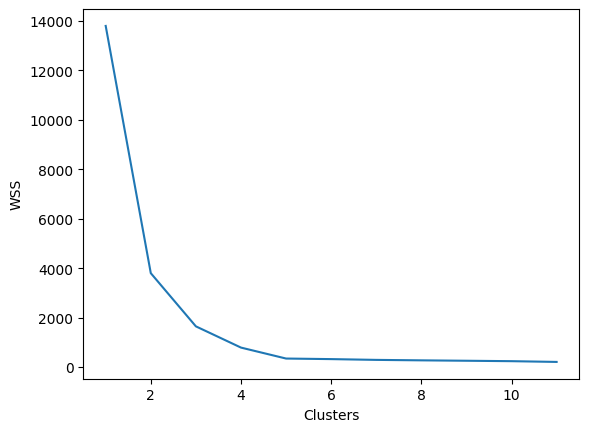

In [61]:
from sklearn.cluster import KMeans
wss = []
k = range(1,12)
for i in k:
    clusterer = KMeans(n_clusters=i)
    clusterer.fit(X,y)
    wss_iter = clusterer.inertia_
    wss.append(wss_iter)
centers = pd.DataFrame({'Clusters' : k, 'WSS' : wss})
sns.lineplot(x='Clusters', y='WSS', data=centers, markers="+")

So, the best K is 3